In [56]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')

# Starting with 100's to prevent error while masking
l,u = 0,300

# Creating track bar
cv2.createTrackbar('l', 'result',0,300,nothing)
cv2.createTrackbar('u', 'result',0,300,nothing)

while(1):

    _, frame = cap.read()

    # get info from track bar and appy to result
    l = cv2.getTrackbarPos('l','result')
    u = cv2.getTrackbarPos('u','result')
    
    blur_img = cv2.GaussianBlur(frame,(3,3),0)

    edge = cv2.Canny(blur_img,l,u)

    cv2.imshow('result',edge)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [2]:
import os
import cv2
import numpy as np
from string import ascii_uppercase

In [11]:
"""train_dir='./asl-alphabet/train/A'
train_dir_img=train_dir+'/{}'

train=[train_dir_img.format(i) for i in os.listdir(train_dir)]
train=[f for f in train if not f.endswith('DS_Store')]

val_dir='./val'
val_dir_img=val_dir+'/{}'

val=[val_dir_img.format(i) for i in os.listdir(val_dir)]
val=[f for f in val if not f.endswith('DS_Store')]"""

test_dir='./asl-alphabet/test/test'
test_dir_img=test_dir+'/{}'

test=[test_dir_img.format(i) for i in os.listdir(test_dir)]
test=[f for f in test if not f.endswith('DS_Store')]

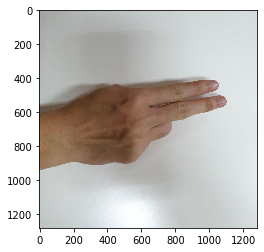

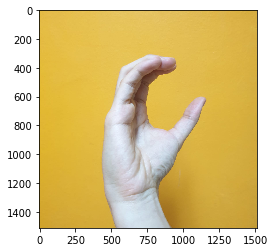

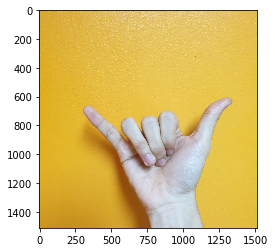

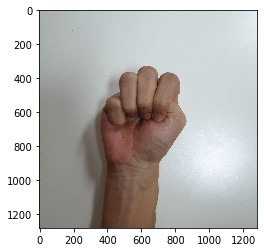

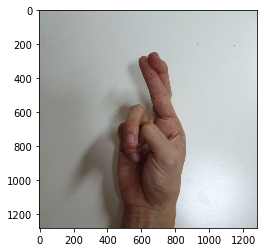

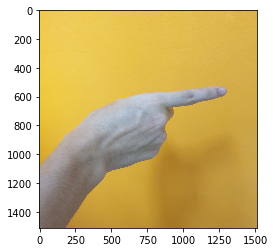

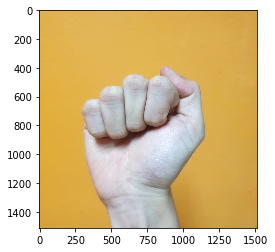

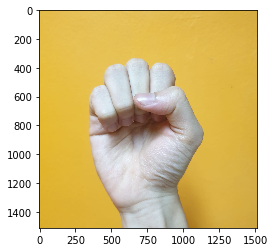

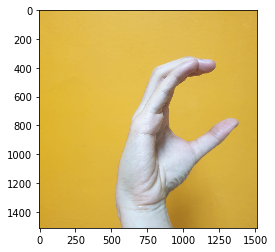

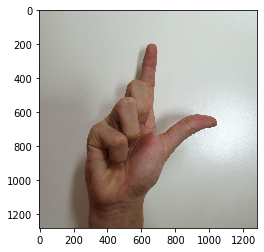

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for ima in test[0:10]:
    img=mpimg.imread(ima)
    imgplot=plt.imshow(img)
    plt.show()

In [13]:
characters=[c for c in ascii_uppercase if c not in "JZ"]
nrows=200
ncolumns=200
channels=3

In [14]:
def read_and_process(list_of_images): 
    lower = 100
    upper = 125
    
    X=[]
    y=[]
    for image in list_of_images:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (nrows, ncolumns), interpolation=cv2.INTER_CUBIC)
        blur_img = cv2.GaussianBlur(img,(3,3),0)      
        edge = cv2.Canny(blur_img,lower,upper)
        
        X.append(edge)   
        for c in characters:
            if c in image:
                y.append(c)
    
    return X,y

In [15]:
"""train_X, train_y = read_and_process(train)
val_X, val_y = read_and_process(val)"""
test_X, test_y = read_and_process(test)

In [19]:
"""train_X = np.array(train_X)
val_X = np.array(val_X)"""
test_X = np.reshape(np.array(test_X), (len(test_X),200,200,1))

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(rescale=1.0/255, 
                                    rotation_range=15,
                                    zoom_range=0.2)

val_datagen =  ImageDataGenerator(rescale=1.0/255)

test_datagen =  ImageDataGenerator(rescale=1.0/255)

Using TensorFlow backend.


In [75]:
batch_size=50

"""train_gen = train_datagen.flow(train_X,
                               train_y,
                               batch_size=batch_size,
                               shuffle=True,
                               seed=0)
val_gen = val_datagen.flow(val_X,
                           val_y,
                           batch_size=batch_size,
                           shuffle=True,
                           seed=0)"""

test_gen = test_datagen.flow(test_X,
                              test_y,
                              batch_size=batch_size,
                              shuffle=True,
                              seed=0)

In [76]:
test_gen_img=np.reshape(test_gen[0][0],(50,200,200))

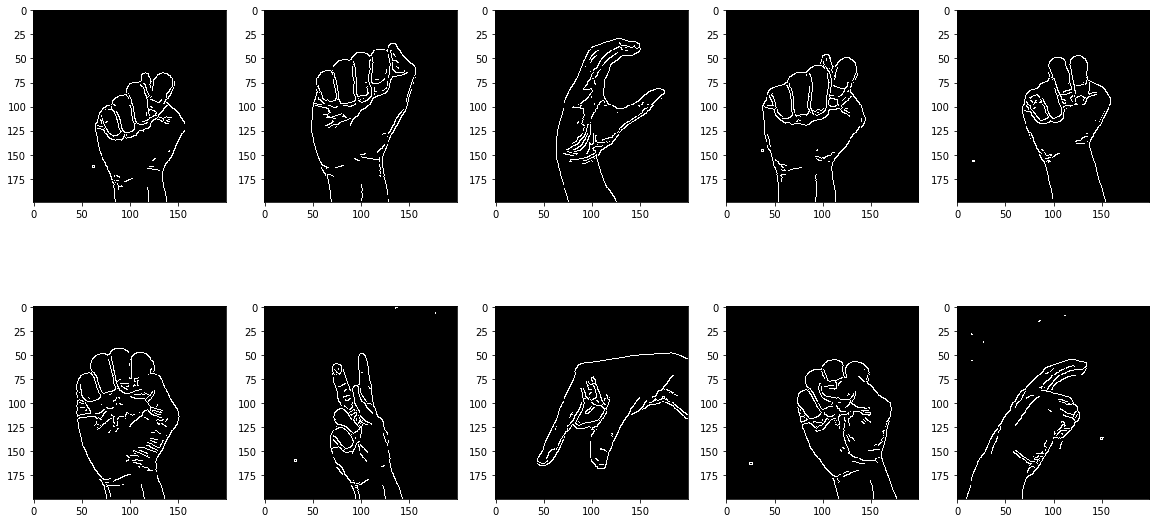

In [77]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(2*columns):
    plt.subplot(5/columns+1,columns,i+1)
    plt.imshow(test_gen_img[i],cmap='gray')

In [ ]:
X, y=read_and_process(test)
len(X), len(y)

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns+1,columns,i+1)
    plt.imshow(X[i])

# Masking

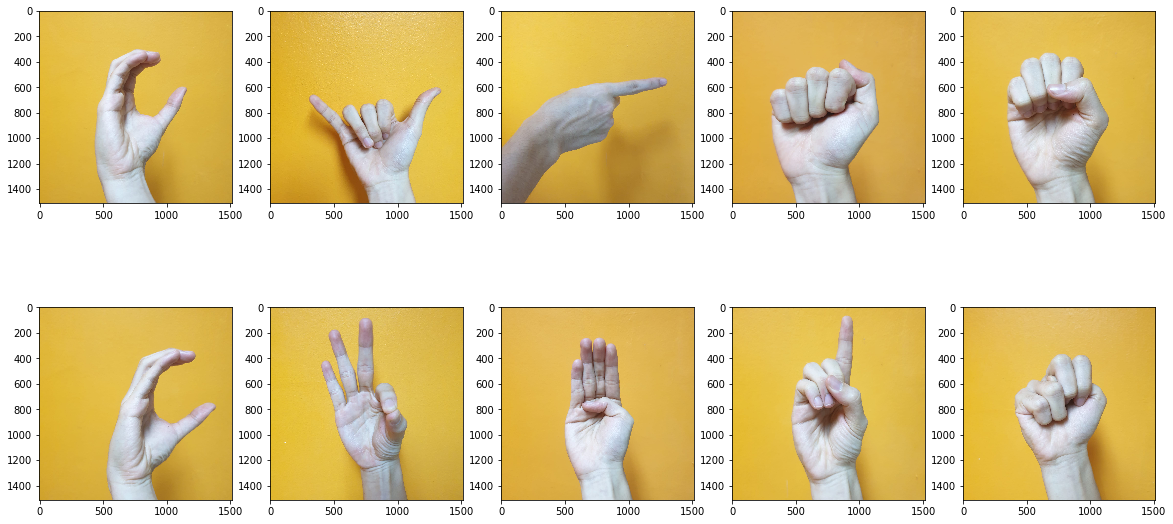

In [10]:
import os
import cv2
import numpy as np

test_dir='./asl-alphabet/test/test'
test_dir_img=test_dir+'/{}'

test=[test_dir_img.format(i) for i in os.listdir(test_dir)]
test=[f for f in test if not f.endswith('DS_Store')]
test=[f for f in test if not f.endswith('.jpg')]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5

for i in range(10):
    plt.subplot(5/columns+1,columns,i+1)
    
    img=mpimg.imread(test[i])
    plt.imshow(img)

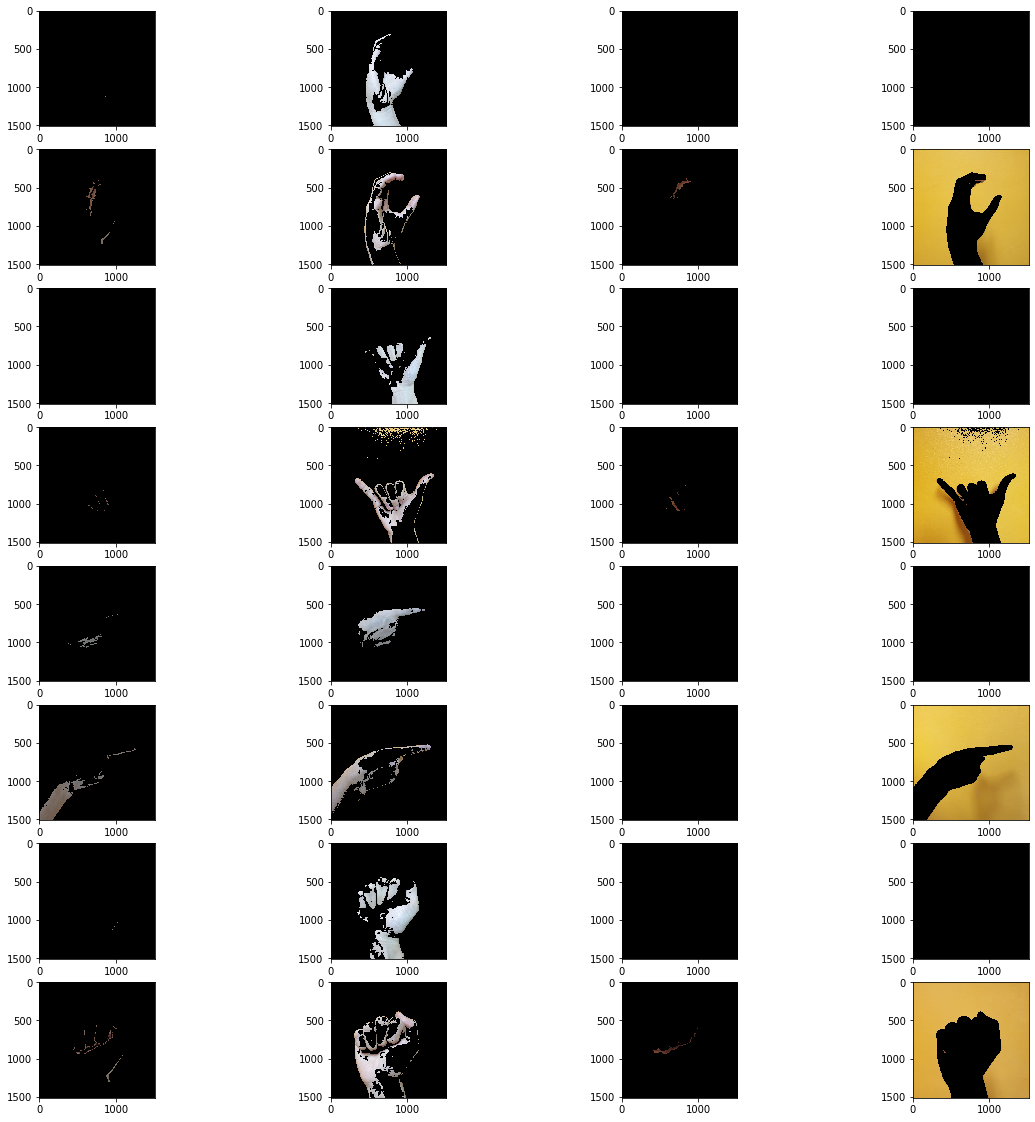

In [49]:
plt.figure(figsize=(20,20))
columns = 4

l1 = [0,91]
u1 = [90,179]

l2=[0,127]
u2=[128,255]

l3=[0,127]
u3=[128,255]

for i in range(4):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                img=mpimg.imread(test[i])

                hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
                lower = np.array([l1[j],l2[k],l3[l]]) 
                upper = np.array([u1[j],u2[k],u3[l]]) 

                mask = cv2.inRange(hsv, lower, upper) 

                res = cv2.bitwise_and(img,img, mask= mask) 

                plt.subplot(8,columns,8*i+4*j+2*k+l+1)
                plt.imshow(res)

value 128, 255
saturation 0, 127
hue 90 179

In [16]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')
cv2.resizeWindow('result', 400,400)

# Starting with 100's to prevent error while masking
hl, hu = 90, 179
sl, su = 0, 127
vl, vu = 128, 255

# Creating track bar
cv2.createTrackbar('hl', 'result',0,179,nothing)
cv2.createTrackbar('hu', 'result',0,179,nothing)
cv2.createTrackbar('sl', 'result',0,255,nothing)
cv2.createTrackbar('su', 'result',0,255,nothing)
cv2.createTrackbar('vl', 'result',0,255,nothing)
cv2.createTrackbar('vu', 'result',0,255,nothing)

while(1):

    _, frame = cap.read()

    # get info from track bar and appy to result
    hl = cv2.getTrackbarPos('hl','result')
    hu = cv2.getTrackbarPos('hu','result')
    sl = cv2.getTrackbarPos('sl','result')
    su = cv2.getTrackbarPos('su','result')
    vl = cv2.getTrackbarPos('vl','result')
    vu = cv2.getTrackbarPos('vu','result')
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    """lower = np.array([hl,sl,vl]) 
    upper = np.array([hu,su,vu])"""
    lower = np.array([0,60,0]) 
    upper = np.array([30,160,255])

    mask = cv2.inRange(hsv, lower, upper)
    
    kernel=kernel = np.ones((10,10),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('result',res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()

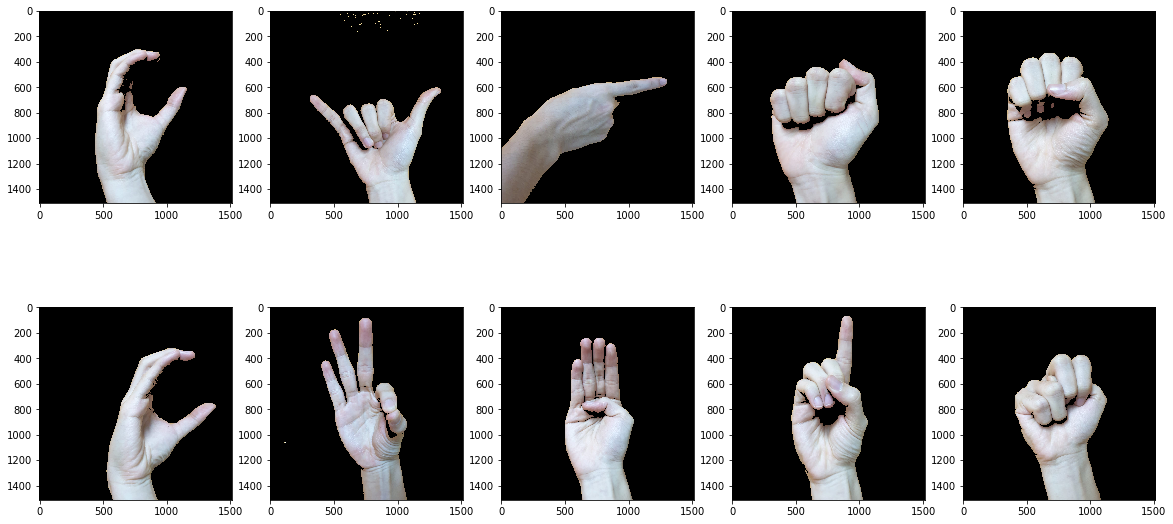

In [14]:
plt.figure(figsize=(20,10))
columns = 5

for i in range(10):
    plt.subplot(2,columns,i+1)
    
    img=mpimg.imread(test[i])

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    lower = np.array([0,0,50]) 
    upper = np.array([179,100,255])

    mask = cv2.inRange(hsv, lower, upper) 

    res = cv2.bitwise_and(img,img, mask= mask) 
    
    plt.imshow(res)

In [13]:
import cv2
import numpy as np

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')
cv2.resizeWindow('result', 400,400)

# Starting with 100's to prevent error while masking
hl, hu = 90, 179
sl, su = 0, 127
vl, vu = 128, 255

# Creating track bar
cv2.createTrackbar('hl', 'result',0,179,nothing)
cv2.createTrackbar('hu', 'result',0,179,nothing)
cv2.createTrackbar('sl', 'result',0,255,nothing)
cv2.createTrackbar('su', 'result',0,255,nothing)
cv2.createTrackbar('vl', 'result',0,255,nothing)
cv2.createTrackbar('vu', 'result',0,255,nothing)

while(1):

    frame = mpimg.imread(test[1])
    frame = cv2.resize(frame,(400,400))

    # get info from track bar and appy to result
    hl = cv2.getTrackbarPos('hl','result')
    hu = cv2.getTrackbarPos('hu','result')
    sl = cv2.getTrackbarPos('sl','result')
    su = cv2.getTrackbarPos('su','result')
    vl = cv2.getTrackbarPos('vl','result')
    vu = cv2.getTrackbarPos('vu','result')
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    lower = np.array([hl,sl,vl]) 
    upper = np.array([hu,su,vu])

    mask = cv2.inRange(hsv, lower, upper)
    
    kernel=kernel = np.ones((10,10),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('result',res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

TypeError: 'tuple' object is not callable

# For Austin

In [ ]:
# Replace the original function with this
def read_and_process(list_of_images): 
    lower = 100
    upper = 125
    
    X=[]
    y=[]
    for image in list_of_images:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (nrows, ncolumns), interpolation=cv2.INTER_CUBIC)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
        
        lower = np.array([0,0,50]) 
        upper = np.array([179,100,255])
        
        # Check the resulting image, if not good then change with:
        #lower = np.array([0,60,0]) 
        #upper = np.array([30,160,255])
        
        # If still not good then run the code in below cell

        mask = cv2.inRange(hsv, lower, upper) 

        res = cv2.bitwise_and(hsv, hsv, mask= mask) 
        
        X.append(res)   
        for c in characters:
            if c in image:
                y.append(c)
    
    return X,y

In [ ]:
# Play with the lower and upper limit for hue, saturation, and value
import cv2
import numpy as np

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')
cv2.resizeWindow('result', 400,400)

# Starting with 100's to prevent error while masking
hl, hu = 90, 179
sl, su = 0, 127
vl, vu = 128, 255

# Creating track bar
cv2.createTrackbar('hl', 'result',0,179,nothing)
cv2.createTrackbar('hu', 'result',0,179,nothing)
cv2.createTrackbar('sl', 'result',0,255,nothing)
cv2.createTrackbar('su', 'result',0,255,nothing)
cv2.createTrackbar('vl', 'result',0,255,nothing)
cv2.createTrackbar('vu', 'result',0,255,nothing)

while(1):

    frame = mpimg.imread(PATH) # Replace path with the path to the image, like the example in below cell
    frame = cv2.resize(frame,(400,400))

    # get info from track bar and appy to result
    hl = cv2.getTrackbarPos('hl','result')
    hu = cv2.getTrackbarPos('hu','result')
    sl = cv2.getTrackbarPos('sl','result')
    su = cv2.getTrackbarPos('su','result')
    vl = cv2.getTrackbarPos('vl','result')
    vu = cv2.getTrackbarPos('vu','result')
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    lower = np.array([hl,sl,vl]) 
    upper = np.array([hu,su,vu])

    mask = cv2.inRange(hsv, lower, upper)
    
    kernel=kernel = np.ones((10,10),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('result',res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()

In [15]:
test[0]

'./asl-alphabet/test/test/test 9_C.jpeg'

### Below are what I get

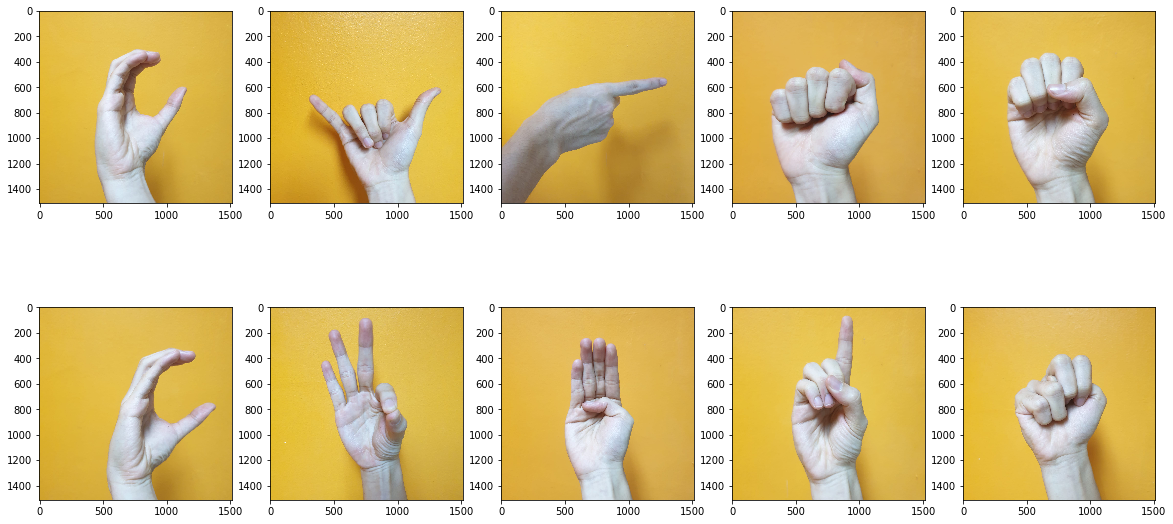

In [10]:
import os
import cv2
import numpy as np

test_dir='./asl-alphabet/test/test'
test_dir_img=test_dir+'/{}'

test=[test_dir_img.format(i) for i in os.listdir(test_dir)]
test=[f for f in test if not f.endswith('DS_Store')]
test=[f for f in test if not f.endswith('.jpg')]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5

for i in range(10):
    plt.subplot(5/columns+1,columns,i+1)
    
    img=mpimg.imread(test[i])
    plt.imshow(img)

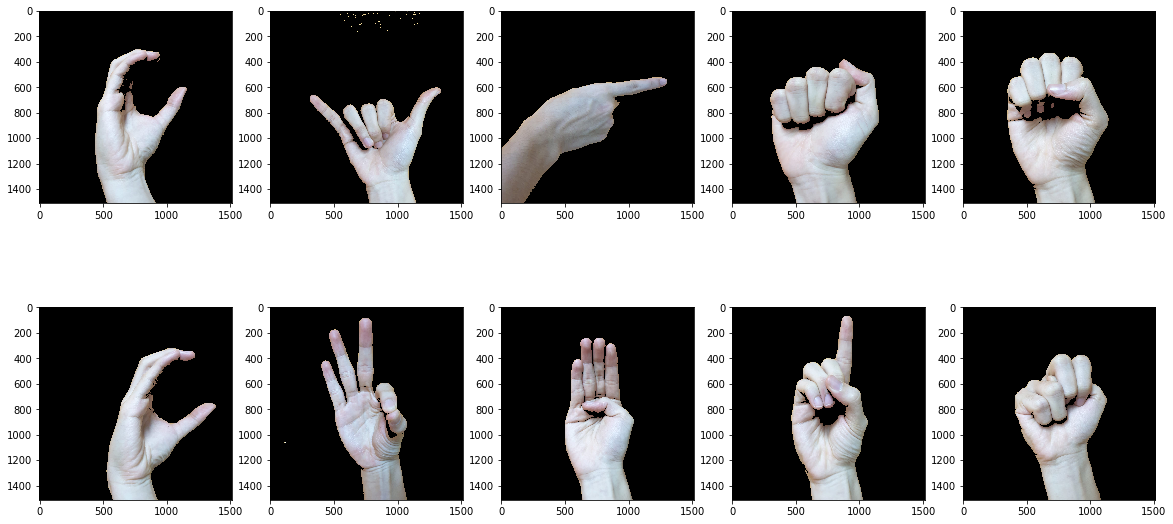

In [14]:
plt.figure(figsize=(20,10))
columns = 5

for i in range(10):
    plt.subplot(2,columns,i+1)
    
    img=mpimg.imread(test[i])

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    lower = np.array([0,0,50]) 
    upper = np.array([179,100,255])

    mask = cv2.inRange(hsv, lower, upper) 

    res = cv2.bitwise_and(img,img, mask= mask) 
    
    plt.imshow(res)

### For live video

In [20]:
# Just run
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')
cv2.resizeWindow('result', 400,400)

# Starting with 100's to prevent error while masking
hl, hu = 90, 179
sl, su = 0, 127
vl, vu = 128, 255

# Creating track bar
cv2.createTrackbar('hl', 'result',0,179,nothing)
cv2.createTrackbar('hu', 'result',0,179,nothing)
cv2.createTrackbar('sl', 'result',0,255,nothing)
cv2.createTrackbar('su', 'result',0,255,nothing)
cv2.createTrackbar('vl', 'result',0,255,nothing)
cv2.createTrackbar('vu', 'result',0,255,nothing)

while(1):

    _, frame = cap.read()
    
    frame = cv2.resize(frame, (1000, 600))

    # get info from track bar and appy to result
    hl = cv2.getTrackbarPos('hl','result')
    hu = cv2.getTrackbarPos('hu','result')
    sl = cv2.getTrackbarPos('sl','result')
    su = cv2.getTrackbarPos('su','result')
    vl = cv2.getTrackbarPos('vl','result')
    vu = cv2.getTrackbarPos('vu','result')
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    lower = np.array([hl,sl,vl]) 
    upper = np.array([hu,su,vu])

    mask = cv2.inRange(hsv, lower, upper)
    
    kernel=kernel = np.ones((10,10),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('result',res)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()